![Aropython_logo](./static/aeropython_name_mini.png)
###### Carlos Dorado Cárdenas
###### Siro Moreno Martín

# Simplifica tu vida con sistemas complejos y algoritmos genéticos

## Parte 3 - Ajuste de algoritmos y paquetes de Python

### 1. Influencia de los parámetros: bifurcaciones, cambios de fase y caos

En nuestros modelos, además de las propias variables de estudio, usaremos casi siempre varios parámetros para controlar su comprotamiento de manera fina. Normalmente, es de esperar que un cambio pequeño de un parámetro se traduzca en un cambio pequeño en el resultado, pero ¡cuidado! ¡No siempre es así!

Llamamos **Bifurcación** a las situaciones en las que pequeños cambios en el valor de un parámetro afectan de manera drástica y cualitativa al comportamiento del sistema. 

Ejemplos: excitación de neuronas, formación de patrones, transición catastrófica de estados en un ecosistema.

Supongamos el siguiente modelo de pocas variables en tiempo continuo:
$$\frac{dx}{dt} = r - x^2$$

Nuestro parámetro, r afecta al comportamiento del sistema de manera drástica en el entorno de r = 0:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def derivada(x,r):
    return r - x **2

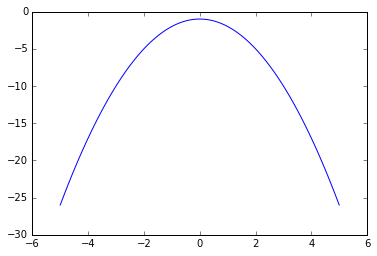

In [4]:
r = -1 #Para r negativo, la derivada de x con t siempre es negativo.
         #Para r positivo, aparecen puntos con derivada positiva o cero!
x = np.linspace(-5,5,100)
y = derivada(x, r)
plt.plot(x,y)

Definamos ahora un modelo de tiempo discreto y pocas variables:
$$ x_t = x_{t-1} + r - x_{t-1}^2 $$
$$ x_0 = 0.1 $$

In [5]:
def iteracion(x, r):
    return x + r - x**2

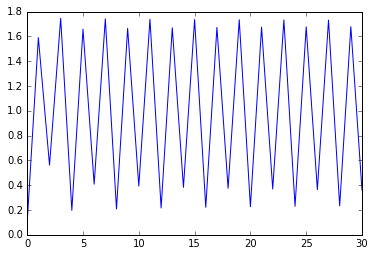

In [15]:
x = 0.1
r = 1.5 #Observa lo que ocurre en los alrededores de r = 1 y r = 1.5
x_acc = [x,]
for ii in range(30):
    x = iteracion(x, r)
    x_acc.append(x)
plt.plot(x_acc)

Analicemos más en detalle lo que pasa con los periodos de este modelo en función de r! 

Para ello, descartaremos los primeros 100 pasos, que consideraremos transitorios, y pintaremos los resultados posteriores.

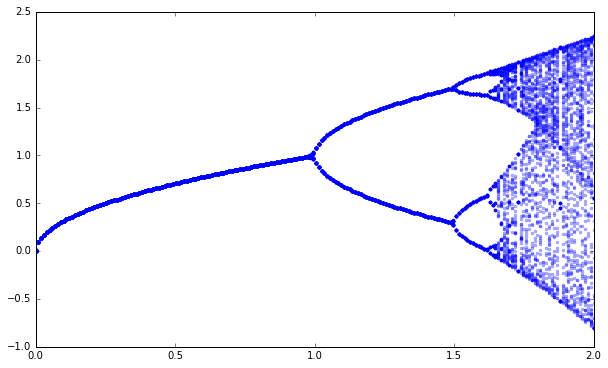

In [22]:
plt.figure(figsize=[10,6])
for r in np.linspace(0, 2, 200):
    x = 0.1
    x_acc = []
    for ii in range(100):
        x = iteracion(x, r)
    for ii in range(100):
        x = iteracion(x, r)
        x_acc.append(x)
    plt.plot([r,]*100,x_acc,  'b.', alpha = 0.3)

Las bifurcaciones que provoca el parámetro r se aprecian claramente, pero... ¿qué es esa zona extraña llena de puntos para r > 1.7 ?

Eso... es Caos.

---

<img src="./imagenes/Star_of_Chaos.jpg" width="250" style="float: right" />


**CAOS**
* Es un comporrtamiento de sistemas dinámicos no lineales que nunca decae a trayectorias estables o periódicas.
* Tiene un aspecto aleatorio, pero proviene de sistemas completamente deterministas.
* Posee una gran sensibilidad a las condiciones iniciales.
* Aparece cuando el periodo de la trayectoria diverge a infinito.
* También aparece cuando no existe ninguna trayectoria estable.
* Es un fenómeno que aparece en la naturaleza de manera muy frecuente, así como en entornos sociales e ingenieriles.

<small>*Fuente de la imagen: [sangre para el Dios de la Sangre!](http://warhammer40k.wikia.com/wiki/Chaos?file=Star_of_Chaos.jpg)*</small>

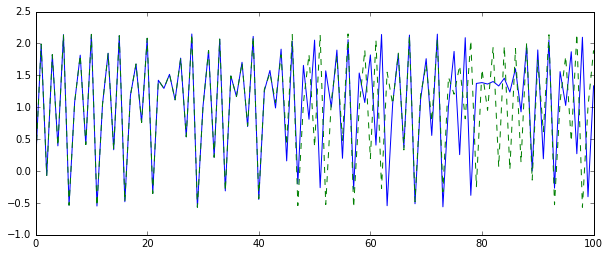

In [36]:
plt.figure(figsize=[10,4])
x = 0.1
x_2 = x + 0.00000001
r = 1.9
x_acc = [x,]
x_acc_2 = [x_2,]
for ii in range(100):
    x = iteracion(x, r)
    x_acc.append(x)
    x_2 = iteracion(x_2, r)
    x_acc_2.append(x_2)
plt.plot(x_acc)
plt.plot(x_acc_2, 'g--')

Citando de nuevo a **Hiroki Sayama**:
<blockquote><strong>Chaos</strong> can be understood as a dynamical process in which <strong>microscopic information</strong> hidden in the details of a system’s state is dug out and <strong>expanded</strong> to a macroscopically visible scale (stretching), while the <strong>macroscopic information</strong> visible in the current system’s state is continuously <strong>discarded</strong> (folding).
</blockquote>

Si te ha gustado este taller, háznoslo saber!

In [1]:
%%html
<a href="https://twitter.com/share" class="twitter-share-button" data-url="https://github.com/AeroPython/Taller-Algoritmos-Geneticos-PyConEs16" data-text="Aprendiendo Algoritmos Genéticos y Sistemas Complejos con" data-via="AeroPython" data-size="large" data-hashtags="PyConEs" data-dnt="true">Tweet</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

Siro Moreno, Aeropython, 7 de Octubre de 2016


In [1]:
# Notebook style
from IPython.core.display import HTML
css_file = './static/style.css'
HTML(open(css_file, "r").read())